In [1]:
from collections import Counter
from nltk.corpus import stopwords
from ruts import WordsExtractor
from ruts.datasets import SovChLit
from ruts.diversity_stats import calc_simpson_index
from ruts.visualizers import zipf, fingerprinting

## Загрузка данных

In [2]:
sc = SovChLit()

In [3]:
texts = [text for text in sc.get_texts(limit=100)]
texts[:5]

['В деревне зимой возле дома не только этих птиц увидеть можно. Сюда и синицы прилетают, и даже осторожные сороки. Голодно им зимой в лесу, вот они и летят поближе к жилью человека, чтобы подкормиться.',
 'Мы остановились, и все другие автомобили остановились, и трамвай остановился.\nЯ спросил:\n— Почему?\nМама объяснила:\n— Вон, видишь, красный фонарик? Это светофор.\nНа проволоке над улицей я увидел фонарик. Он горел красным светом.\n— И долго мы стоять будем?\n— Нет. Сейчас вот проедут, кому через улицу надо переезжать, и поедем.\nИ все смотрели на красный фонарик.\nВдруг он загорелся жёлтым светом, а потом зелёным. И мы поехали.\nПотом ещё раз на улице горел красный фонарик. Я уж знал, зачем он горит, и закричал:\n— Дядя, стойте! Красный огонь!',
 'Купил отец Коле новенькие ботинки, блестящие, со шнурками. На подошве написано: «Скороход». Отец Коли сам работает на фабрике «Скороход».\n— Ты долго эти ботинки шил? — спросил Коля у отца.— Трудно, наверное, было дырочки для шнурков дел

## Закон Ципфа

In [4]:
text = '\n'.join(texts)

In [5]:
we = WordsExtractor(text, use_lexemes=True, stopwords=stopwords.words('russian'), filter_nums=True)

In [6]:
tokens_with_count = Counter(we.extract())

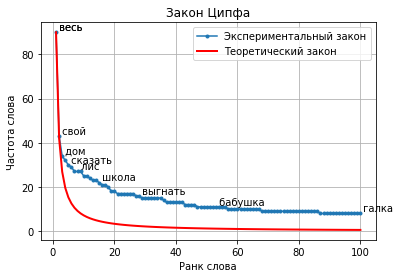

In [7]:
zipf(tokens_with_count, num_words=100, num_labels=10, log=False, show_theory=True, alpha=1.1)

## Литературная дактилоскопия

In [4]:
words = []
for text in texts:
    words_extractor = WordsExtractor(text, lowercase=True)
    words.append(words_extractor.extract())

In [5]:
words[0]

('в',
 'деревне',
 'зимой',
 'возле',
 'дома',
 'не',
 'только',
 'этих',
 'птиц',
 'увидеть',
 'можно',
 'сюда',
 'и',
 'синицы',
 'прилетают',
 'и',
 'даже',
 'осторожные',
 'сороки',
 'голодно',
 'им',
 'зимой',
 'в',
 'лесу',
 'вот',
 'они',
 'и',
 'летят',
 'поближе',
 'к',
 'жилью',
 'человека',
 'чтобы',
 'подкормиться')

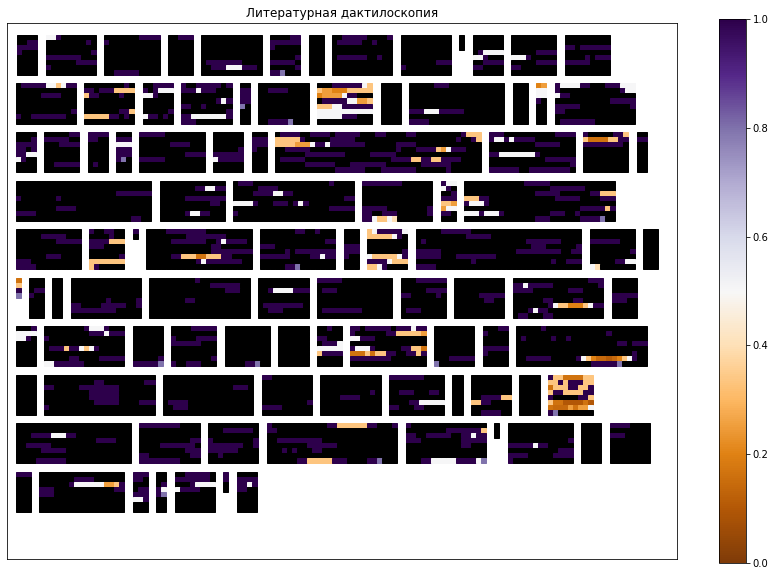

In [10]:
fingerprinting(words, 
               metric=calc_simpson_index, 
               x_size=1000, 
               y_size=800,
               is_return=False)